In [791]:
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
%matplotlib inline

### source:
### https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243

### I added zipcodes and neighboorghoods to this data set, how I did it it is decribed in my other file called "crime data merging with zip codes and hoods" , 


In [792]:
data_raw=pd.read_csv(r"C:\Users\Maryla\Desktop\school\4400\PROJECT\CRIME DATA\merged_crime_zip_hood2.csv", encoding='latin1', index_col=[0])
# use the encoding as latin1 to read this file as there are some special character in this file, 
# use the below code snippet to read the file

In [793]:
data_raw.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,X_COORD_CD,Y_COORD_CD,Latitude_x,Longitude_x,Lat_Lon,geo2,geo4_x,geo3_x,Incident Zip,neighbourhood
0,314773184,48,BRONX,12/31/2019,18:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)","40.83,-73.88","40.8380,-73.8816","40.838,-73.881",10460.0,Tremont
1,289837961,25,MANHATTAN,12/30/2019,20:30:00,12/31/2019,10:00:00,COMPLETED,NaN,NaN,...,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)","40.80,-73.94","40.8003,-73.9456","40.800,-73.945",10029.0,Harlem
2,535744284,77,BROOKLYN,12/24/2019,16:55:00,12/24/2019,17:00:00,COMPLETED,NaN,NaN,...,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)","40.66,-73.93","40.6698,-73.9393","40.669,-73.939",11213.0,Crown Heights
3,895678119,52,BRONX,12/30/2019,19:32:00,NaN,NaN,COMPLETED,NaN,NaN,...,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)","40.87,-73.90","40.8736,-73.9080","40.873,-73.908",10463.0,Kingsbridge
4,299841674,18,MANHATTAN,12/30/2019,15:30:00,12/30/2019,16:50:00,COMPLETED,NaN,NaN,...,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)","40.76,-73.99","40.7609,-73.9945","40.760,-73.994",10036.0,Hell's Kitchen


### data cleaning part

In [794]:
# let's change column order so location is in front
# I will also remove some columns such as housing development, ststion name, or park location since there is a lot of missiing data in it

In [795]:
col_list=list(data_raw.columns)
print(col_list)

['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude_x', 'Longitude_x', 'Lat_Lon', 'geo2', 'geo4_x', 'geo3_x', 'Incident Zip', 'neighbourhood']


In [796]:
#data_raw["PD_CD"].unique()

In [797]:
data=data_raw[['CMPLNT_NUM',  'BORO_NM', 'Incident Zip', 'neighbourhood' , 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD',  'OFNS_DESC','SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'Latitude_x', 'Longitude_x', 'Lat_Lon' ]]

In [798]:
data.info()
#zipcodes 448,495 out of 461,711 is not null ((13,216 is null)- 
# I have some missing data in zipcodes, 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 461711 entries, 0 to 461710
Data columns (total 17 columns):
CMPLNT_NUM        461711 non-null int64
BORO_NM           461711 non-null object
Incident Zip      448495 non-null float64
neighbourhood     455225 non-null object
CMPLNT_FR_DT      461711 non-null object
CMPLNT_FR_TM      461711 non-null object
LAW_CAT_CD        461711 non-null object
OFNS_DESC         461699 non-null object
SUSP_AGE_GROUP    352301 non-null object
SUSP_RACE         352301 non-null object
SUSP_SEX          352301 non-null object
VIC_AGE_GROUP     461708 non-null object
VIC_RACE          461708 non-null object
VIC_SEX           461708 non-null object
Latitude_x        461711 non-null float64
Longitude_x       461711 non-null float64
Lat_Lon           461711 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 63.4+ MB


In [799]:
# other way to do it - we have 13,216 empty rows in col zipcodes and  6,486 is mising in "neighbourhood"

null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Incident Zip       13216
neighbourhood       6486
OFNS_DESC             12
SUSP_AGE_GROUP    109410
SUSP_RACE         109410
SUSP_SEX          109410
VIC_AGE_GROUP          3
VIC_RACE               3
VIC_SEX                3
dtype: int64

In [801]:
# let's see if how many valus is null for both zip and neighbourhood: 
null_zip=data[data["Incident Zip"].isnull()]
null_zip[null_zip["neighbourhood"].isnull()].count()

CMPLNT_NUM        2580
BORO_NM           2580
Incident Zip         0
neighbourhood        0
CMPLNT_FR_DT      2580
CMPLNT_FR_TM      2580
LAW_CAT_CD        2580
OFNS_DESC         2580
SUSP_AGE_GROUP    1771
SUSP_RACE         1771
SUSP_SEX          1771
VIC_AGE_GROUP     2580
VIC_RACE          2580
VIC_SEX           2580
Latitude_x        2580
Longitude_x       2580
Lat_Lon           2580
dtype: int64

In [693]:
#lools like of ouf all missing data in both zipcodes and nieighboorhood there is only 2580 rows that are null for both zip and hood.
# I think the best would be drop rows both for neighborhoods and zipcodes

In [694]:
#null_hood[null_hood["Incident Zip"].isnull()]

In [802]:
#drop data with missing neighborhood and zipcodes- 
#victims age,race and sex - potencialy something wrong with data since we dont know who is victim
data=data.dropna( subset=["neighbourhood","VIC_AGE_GROUP","VIC_RACE","VIC_SEX", "Incident Zip"])

In [696]:
null_columns2=data.columns[data.isnull().any()]
data[null_columns2].isnull().sum()
# we have a lot of mising data about suspect which is ok

OFNS_DESC             12
SUSP_AGE_GROUP    103879
SUSP_RACE         103879
SUSP_SEX          103879
dtype: int64

In [697]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444586 entries, 0 to 461710
Data columns (total 17 columns):
CMPLNT_NUM        444586 non-null int64
BORO_NM           444586 non-null object
Incident Zip      444586 non-null float64
neighbourhood     444586 non-null object
CMPLNT_FR_DT      444586 non-null object
CMPLNT_FR_TM      444586 non-null object
LAW_CAT_CD        444586 non-null object
OFNS_DESC         444574 non-null object
SUSP_AGE_GROUP    340707 non-null object
SUSP_RACE         340707 non-null object
SUSP_SEX          340707 non-null object
VIC_AGE_GROUP     444586 non-null object
VIC_RACE          444586 non-null object
VIC_SEX           444586 non-null object
Latitude_x        444586 non-null float64
Longitude_x       444586 non-null float64
Lat_Lon           444586 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 61.1+ MB


In [ ]:
# we have two ways to describe crime: Law_cat_cd and offense_dicription, lets explore those columns

In [698]:
data["LAW_CAT_CD"].unique()

array(['FELONY', 'MISDEMEANOR', 'VIOLATION'], dtype=object)

In [699]:
data["OFNS_DESC"].unique()

array(['ROBBERY', 'PETIT LARCENY', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', 'SEX CRIMES', 'HARRASSMENT 2',
       'GRAND LARCENY', 'THEFT-FRAUD', 'BURGLARY',
       'VEHICLE AND TRAFFIC LAWS', 'FORGERY', 'DANGEROUS WEAPONS', 'RAPE',
       'GRAND LARCENY OF MOTOR VEHICLE', 'DANGEROUS DRUGS',
       'MURDER & NON-NEGL. MANSLAUGHTER', 'KIDNAPPING',
       'CRIMINAL MISCHIEF & RELATED OF', 'MISCELLANEOUS PENAL LAW',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY', 'CRIMINAL TRESPASS',
       'ARSON', 'OFFENSES INVOLVING FRAUD',
       'OFFENSES AGAINST PUBLIC ADMINI', 'ADMINISTRATIVE CODE',
       'UNAUTHORIZED USE OF A VEHICLE', 'GAMBLING',
       'INTOXICATED & IMPAIRED DRIVING', 'OFF. AGNST PUB ORD SENSBLTY &',
       nan, 'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST THE PERSON',
       'THEFT OF SERVICES', 'KIDNAPPING & RELATED OFFENSES',
       'OTHER OFFENSES RELATED TO THEF', "BURGLAR'S TOOLS", 'ESCAPE 3',
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',

In [ ]:
# Both looks usefull, I keep them
# Let's do some cleanup in other columns such as victim aga and suspec age

In [701]:
data["VIC_AGE_GROUP"].unique()
#some data needs cleaning

array(['45-64', '25-44', '18-24', 'UNKNOWN', '65+', '<18', '-954', '943',
       '929', '-967', '1018', '-961', '-952', '936', '-943', '956', '941',
       '-942', '1013', '937', '-946', '-974', '951', '960', '927', '-2',
       '938', '-934', '-978', '-970'], dtype=object)

In [702]:
drop_index=data[(data["VIC_AGE_GROUP"]!="45-64") & (data["VIC_AGE_GROUP"]!="25-44")&
                    (data["VIC_AGE_GROUP"]!="18-24") & (data["VIC_AGE_GROUP"]!="65+")&
                   (data["VIC_AGE_GROUP"]!="<18")& (data["VIC_AGE_GROUP"]!="UNKNOWN")].index


In [703]:
data.drop(drop_index , inplace=True)
data["VIC_AGE_GROUP"].unique()

array(['45-64', '25-44', '18-24', 'UNKNOWN', '65+', '<18'], dtype=object)

In [704]:
data["VIC_RACE"].unique()

array(['WHITE HISPANIC', 'WHITE', 'UNKNOWN', 'BLACK',
       'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC',
       'AMERICAN INDIAN/ALASKAN NATIVE'], dtype=object)

In [705]:
# Victim’s Sex Description (D=Business/Organization,E=PSNY/People of the State of New York, F=Female,M=Male)
data["VIC_SEX"].unique()

array(['F', 'M', 'D', 'E'], dtype=object)

In [706]:
data["SUSP_AGE_GROUP"].unique()


array(['UNKNOWN', nan, '25-44', '65+', '45-64', '18-24', '<18', '-965',
       '2019', '-966', '-964', '-973', '-968', '930', '-1', '947', '924',
       '929', '1019', '940'], dtype=object)

In [707]:
drop_index=data[(data["SUSP_AGE_GROUP"]!="45-64") & (data["SUSP_AGE_GROUP"]!="25-44")&
                    (data["SUSP_AGE_GROUP"]!="18-24") & (data["SUSP_AGE_GROUP"]!="65+")&
                   (data["SUSP_AGE_GROUP"]!="<18")& (data["SUSP_AGE_GROUP"]!="UNKNOWN")].index

data.drop(drop_index , inplace=True)
data["SUSP_AGE_GROUP"].unique()

array(['UNKNOWN', '25-44', '65+', '45-64', '18-24', '<18'], dtype=object)

In [708]:
data["SUSP_SEX"].unique()

array(['U', 'M', 'F'], dtype=object)

In [709]:
data["SUSP_RACE"].unique()

array(['UNKNOWN', 'BLACK', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [710]:
data["CMPLNT_FR_DT"].unique()

array(['12/31/2019', '12/24/2019', '12/30/2019', ..., '8/15/2017',
       '7/28/2009', '1/3/2016'], dtype=object)

In [711]:
data["Incident Zip"].dtype

dtype('float64')

In [712]:
# looks likzipcode is a float, need to change to string

In [713]:
data["Incident Zip"]=data["Incident Zip"].astype(int)

In [714]:
data["Incident Zip"]=data["Incident Zip"].astype(str)

In [715]:
data["Incident Zip"].dtype

dtype('O')

In [716]:
data.head()

,CMPLNT_NUM,BORO_NM,Incident Zip,neighbourhood,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude_x,Longitude_x,Lat_Lon
0,314773184,BRONX,10460,Tremont,12/31/2019,18:00:00,FELONY,ROBBERY,UNKNOWN,UNKNOWN,U,45-64,WHITE HISPANIC,F,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
2,535744284,BROOKLYN,11213,Crown Heights,12/24/2019,16:55:00,FELONY,FELONY ASSAULT,UNKNOWN,BLACK,M,18-24,WHITE,M,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,BRONX,10463,Kingsbridge,12/30/2019,19:32:00,MISDEMEANOR,PETIT LARCENY,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
6,628084657,BROOKLYN,11236,Canarsie,12/22/2019,16:30:00,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,25-44,BLACK,M,25-44,BLACK,M,40.629159,-73.905299,"(40.629158526000026, -73.90529923099997)"
7,487138011,BRONX,10472,Parkchester,12/29/2019,17:20:00,FELONY,ROBBERY,UNKNOWN,WHITE HISPANIC,M,25-44,BLACK,M,40.830641,-73.874879,"(40.83064129700006, -73.87487918899996)"


### looks like we have data from many different years. I want only the latest -2019 data

In [717]:
#remove all data that is not for 2019 year
data["year"]=data.apply(lambda row: row.CMPLNT_FR_DT[-4:], axis=1)
data["year"]=data["year"].astype(str)
data.drop(data[data["year"]!="2019"].index, inplace=True)

In [718]:
#create new column called months to aggregate by month and year
data["DateList"]=data.apply(lambda row: row.CMPLNT_FR_DT.split("/"), axis =1)
data["Month"]=data.apply(lambda row: row.DateList[0],axis=1)
data["Day"]=data.apply(lambda row: row.DateList [1],axis=1)

data.head(2)

,CMPLNT_NUM,BORO_NM,Incident Zip,neighbourhood,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude_x,Longitude_x,Lat_Lon,year,DateList,Month,Day
0,314773184,BRONX,10460,Tremont,12/31/2019,18:00:00,FELONY,ROBBERY,UNKNOWN,UNKNOWN,...,45-64,WHITE HISPANIC,F,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)",2019,"[12, 31, 2019]",12,31
2,535744284,BROOKLYN,11213,Crown Heights,12/24/2019,16:55:00,FELONY,FELONY ASSAULT,UNKNOWN,BLACK,...,18-24,WHITE,M,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)",2019,"[12, 24, 2019]",12,24


In [719]:
data.drop(["DateList"],axis=1)

,CMPLNT_NUM,BORO_NM,Incident Zip,neighbourhood,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude_x,Longitude_x,Lat_Lon,year,Month,Day
0,314773184,BRONX,10460,Tremont,12/31/2019,18:00:00,FELONY,ROBBERY,UNKNOWN,UNKNOWN,U,45-64,WHITE HISPANIC,F,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)",2019,12,31
2,535744284,BROOKLYN,11213,Crown Heights,12/24/2019,16:55:00,FELONY,FELONY ASSAULT,UNKNOWN,BLACK,M,18-24,WHITE,M,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)",2019,12,24
3,895678119,BRONX,10463,Kingsbridge,12/30/2019,19:32:00,MISDEMEANOR,PETIT LARCENY,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)",2019,12,30
6,628084657,BROOKLYN,11236,Canarsie,12/22/2019,16:30:00,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,25-44,BLACK,M,25-44,BLACK,M,40.629159,-73.905299,"(40.629158526000026, -73.90529923099997)",2019,12,22
7,487138011,BRONX,10472,Parkchester,12/29/2019,17:20:00,FELONY,ROBBERY,UNKNOWN,WHITE HISPANIC,M,25-44,BLACK,M,40.830641,-73.874879,"(40.83064129700006, -73.87487918899996)",2019,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461701,912917376,MANHATTAN,10011,Greenwich Village,1/4/2019,10:10:00,FELONY,GRAND LARCENY,UNKNOWN,UNKNOWN,U,45-64,WHITE,M,40.735398,-73.998277,"(40.73539825200004, -73.99827664799993)",2019,1,4
461704,781940970,QUEENS,11372,East Elmhurst,1/5/2019,8:45:00,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,F,25-44,WHITE HISPANIC,M,40.755714,-73.883975,"(40.755714116000036, -73.88397502899994)",2019,1,5
461705,352845293,MANHATTAN,10009,East Village,1/4/2019,3:30:00,FELONY,GRAND LARCENY,UNKNOWN,UNKNOWN,U,25-44,BLACK,F,40.727138,-73.984195,"(40.72713821200006, -73.98419514299998)",2019,1,4
461707,249722424,QUEENS,11411,Cambria Heights,1/2/2019,22:40:00,FELONY,FELONY ASSAULT,25-44,BLACK,F,25-44,BLACK,M,40.692214,-73.733559,"(40.692213915000025, -73.73355857399997)",2019,1,2


## OK, LET'S DO SOME ANALYSIS

### which boroughs have the higest crime rate vs  the higest crime volume

In [720]:
data.groupby("BORO_NM").agg({"CMPLNT_NUM":"count"})

,CMPLNT_NUM
BORO_NM,
BRONX,75407
BROOKLYN,94551
MANHATTAN,90050
QUEENS,63244
STATEN ISLAND,10724


In [721]:
#this doesnt take under concideration boro size...
crime_by_boro=data.groupby("BORO_NM").agg({"CMPLNT_NUM":"count"})

### I am taking population of each borough and divide crime by populaton to get percentage per capita

#### https://www.citypopulation.de/en/usa/newyorkcity/
####  Bronx = 1432132  , Brooklyn = 2582830, Queens = 2278906, Manhattan=1628701, Staten Island=476179

In [722]:
total_peps=[1432132, 2582830, 1628701,2278906, 476179]
crime_by_boro["total_peps"]= total_peps

In [723]:
crime_by_boro

,CMPLNT_NUM,total_peps
BORO_NM,,
BRONX,75407,1432132
BROOKLYN,94551,2582830
MANHATTAN,90050,1628701
QUEENS,63244,2278906
STATEN ISLAND,10724,476179


In [724]:
crime_by_boro["crime_per_capita"]=crime_by_boro.apply(lambda row: row.total_peps/row.CMPLNT_NUM,axis=1)

In [725]:
crime_by_boro

,CMPLNT_NUM,total_peps,crime_per_capita
BORO_NM,,,
BRONX,75407,1432132,18.992030
BROOKLYN,94551,2582830,27.316792
MANHATTAN,90050,1628701,18.086630
QUEENS,63244,2278906,36.033553
STATEN ISLAND,10724,476179,44.403115


In [726]:
# looks like by Staten island had the higest crime per capita,and Manhattan the lowest. let see this in barplot comparison
boro=np.array(crime_by_boro.index)
crime_per_capita=np.array(crime_by_boro.crime_per_capita)
complains=np.array(crime_by_boro.CMPLNT_NUM)

<Figure size 432x288 with 0 Axes>

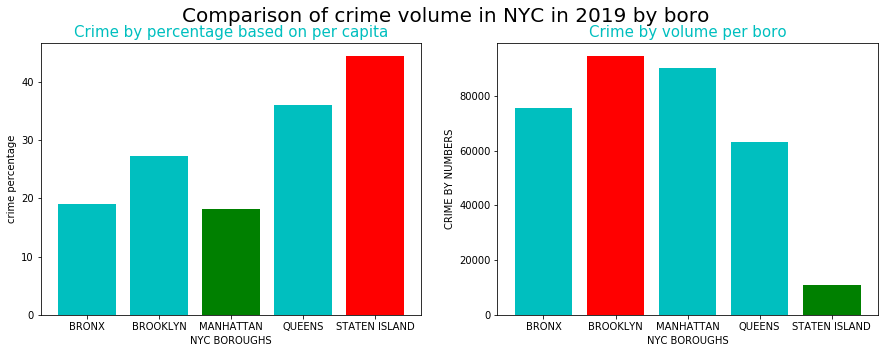

In [727]:
fig = plt.figure()
fig, axs = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle("Comparison of crime volume in NYC in 2019 by boro",color="k",fontsize=20     )

colors=["c","c","g","c","r"]
axs[0].bar(boro,crime_per_capita,color=colors)
axs[0].set_title("Crime by percentage based on per capita", color="c", size=15)
axs[0].set(xlabel="NYC BOROUGHS", ylabel="crime percentage")

colors=["c","r","c","c","g"]
axs[1].bar(boro,complains,color=colors )
axs[1].set(ylabel="CRIME BY NUMBERS",xlabel="NYC BOROUGHS")
axs[1].set_title("Crime by volume per boro",color="c", size=15)
plt.show()

#### Staten Isand has the higest rate of crimes per capita, follow by Queens, while Manhattan the smallest.
#### Brooklyn has the highest number of crimes but if counted crime per capita is right in the middle. 
#### Conclusion:  I won't be moving to Staten Island any time soon...

### What is respectivelly the suspect and victim age,sex and race? 

In [728]:
# create new data frame so we can remove "unknown" data without distorting data in our main data set
age_sex_race=data

In [729]:
drop_index=age_sex_race[(age_sex_race["SUSP_AGE_GROUP"]=="UNKNOWN")].index
age_sex_race.drop(drop_index, inplace=True)
age_sex_race=data
drop_index=age_sex_race[(age_sex_race["SUSP_SEX"]=="U")].index
age_sex_race.drop(drop_index, inplace=True)
age_sex_race=data
drop_index=age_sex_race[(age_sex_race["SUSP_RACE"]=="UNKNOWN")].index
age_sex_race.drop(drop_index, inplace=True)

In [730]:
age=age_sex_race.groupby("SUSP_AGE_GROUP").agg({"CMPLNT_NUM":"count"})
sex=age_sex_race.groupby("SUSP_SEX").agg({"CMPLNT_NUM":"count"})
race=age_sex_race.groupby("SUSP_RACE").agg({"CMPLNT_NUM":"count"})

In [731]:
age_arr=np.array(age.index)
age_compl=np.array(age.CMPLNT_NUM)

sex_arr=np.array(sex.index)
sex_compl=np.array(sex.CMPLNT_NUM)

race_arr=np.array(race.index)
race_compl=np.array(race.CMPLNT_NUM)

In [732]:
#names in race array are to long for display so need to make them shorter
race_arr=np.array(['AMER/INDIAN' ,'ASIAN', 'BLACK',
 'BLACK/HISP' ,'WHITE', 'WHITE/HISP'])

In [733]:
# do the same for victim age, race nd sex

In [734]:
#drop the unknown idexes
age_sex_race_victim=data
drop_index=age_sex_race_victim[(age_sex_race_victim["VIC_AGE_GROUP"]=="UNKNOWN")].index
age_sex_race_victim.drop(drop_index, inplace=True)

age_sex_race=data
drop_index=age_sex_race_victim[(age_sex_race_victim["VIC_SEX"]=="D")].index
age_sex_race_victim.drop(drop_index, inplace=True)
drop_index=age_sex_race_victim[(age_sex_race_victim["VIC_SEX"]=="E")].index
age_sex_race_victim.drop(drop_index, inplace=True)
#there was less then 20 crimes pertaining "D" or"B" so I removed it.

age_sex_race_victim=data
drop_index=age_sex_race_victim[(age_sex_race_victim["VIC_RACE"]=="UNKNOWN")].index
age_sex_race_victim.drop(drop_index, inplace=True)

In [735]:
#aggregate data
vic_age=age_sex_race_victim.groupby("VIC_AGE_GROUP").agg({"CMPLNT_NUM":"count"})
vic_sex=age_sex_race_victim.groupby("VIC_SEX").agg({"CMPLNT_NUM":"count"})
vic_race=age_sex_race_victim.groupby("VIC_RACE").agg({"CMPLNT_NUM":"count"})

In [736]:
vic_sex

,CMPLNT_NUM
VIC_SEX,
F,81234
M,48596


In [737]:
#create arrays for victim age,sex, race
age_arr_vic=np.array(vic_age.index)
age_compl_vic=np.array(vic_age.CMPLNT_NUM)

sex_arr_vic=np.array(vic_sex.index)
sex_compl_vic=np.array(vic_sex.CMPLNT_NUM)

race_arr_vic=np.array(vic_race.index)
race_compl_vic=np.array(vic_race.CMPLNT_NUM)

In [738]:
#names in race array are to long for display so need to make them shorter
race_arr_vic=np.array(['AMER/INDIAN' ,'ASIAN', 'BLACK',
 'BLACK/HISP' ,'WHITE', 'WHITE/HISP'])

In [739]:
#let see results in graph bars

<Figure size 432x288 with 0 Axes>

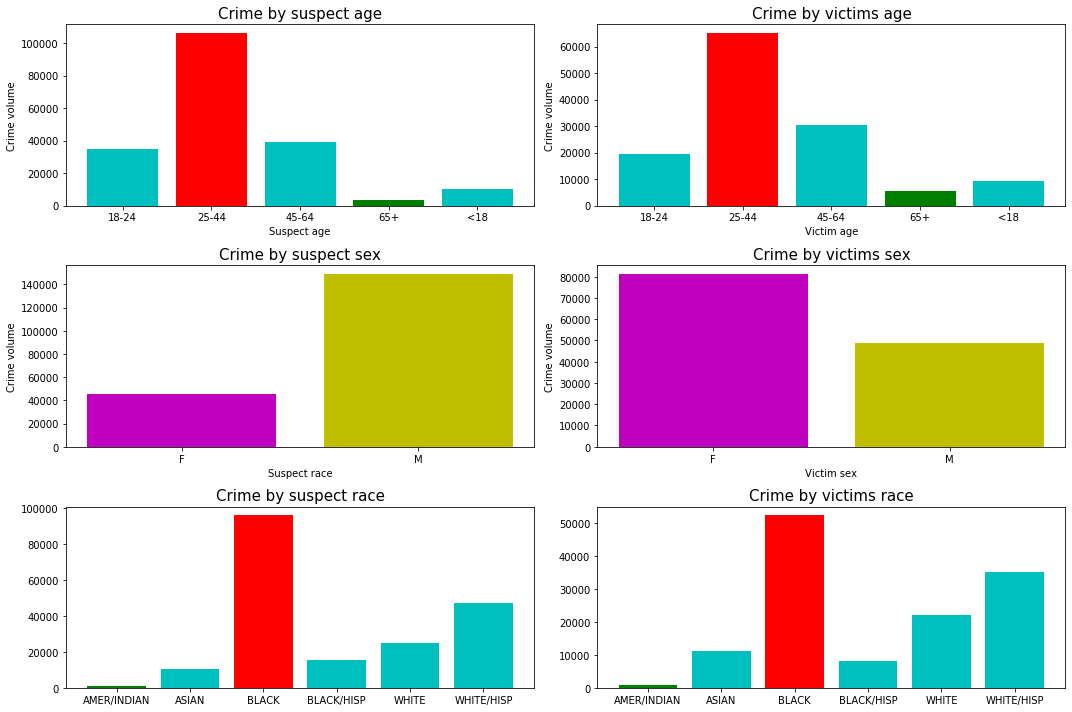

In [740]:
fig=plt.figure()
fig,axs = plt.subplots(3,2, figsize=(15,10))
#fig.suptitle("Sex, race and age of the suspect versus those of a victim.", color="k",fontsize=18)

col=["c","r","c","g","c"]
axs[0,0].set_title("Crime by suspect age", fontsize=15)
axs[0,0].bar(age_arr,age_compl, color=col)
axs[0,1].set_title("Crime by victims age", fontsize=15)
axs[0,1].bar(age_arr_vic,age_compl_vic,color=col)
axs[0,0].set(ylabel="Crime volume", xlabel="Suspect age")
axs[0,1].set(ylabel="Crime volume", xlabel="Victim age")


col=["m","y"]
axs[1,0].set_title("Crime by suspect sex", fontsize=15)
axs[1,0].bar(sex_arr,sex_compl,color=col)
axs[1,1].set_title("Crime by victims sex", fontsize=15)
axs[1,1].bar(sex_arr_vic,sex_compl_vic ,color=col)
axs[1,0].set(ylabel="Crime volume", xlabel=" Suspect sex")
axs[1,1].set(ylabel="Crime volume", xlabel="Victim sex")

col=["g","c","r","c","c","c"]
axs[2,0].set_title("Crime by suspect race", fontsize=15)
axs[2,0].bar(race_arr, race_compl,color=col)
axs[2,1].set_title("Crime by victims race", fontsize=15)
axs[2,1].bar(race_arr_vic, race_compl_vic,color=col)
axs[1,0].set(ylabel="Crime volume", xlabel="Suspect race")
axs[1,1].set(ylabel="Crime volume", xlabel="Victim sex")

plt.tight_layout()
plt.show()


###  type of crime by boro

In [741]:
crime_by_boro=data.groupby(["BORO_NM","LAW_CAT_CD"]).agg({"CMPLNT_NUM":"count"}).reset_index()

In [742]:
crime_by_boro.head()

,BORO_NM,LAW_CAT_CD,CMPLNT_NUM
0,BRONX,FELONY,7583
1,BRONX,MISDEMEANOR,15607
2,BRONX,VIOLATION,8570
3,BROOKLYN,FELONY,11110
4,BROOKLYN,MISDEMEANOR,16519


In [743]:
# using crosstab to compute a simple cross tabulation of two  factors boro and type of crime
crime_by_boro_plot=pd.crosstab(data['BORO_NM'],data['LAW_CAT_CD'])
crime_by_boro_plot

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
BORO_NM,,,
BRONX,7583,15607,8570
BROOKLYN,11110,16519,10958
MANHATTAN,6715,12491,7155
QUEENS,7903,12077,7937
STATEN ISLAND,1198,2291,1716


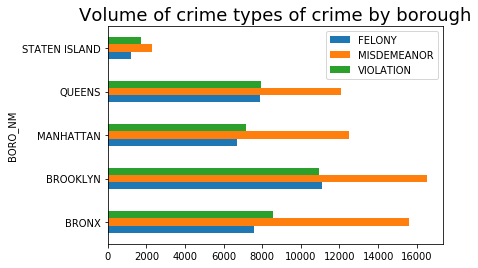

In [744]:
crime_by_boro_plot.plot.barh()
plt.legend(loc=1,bbox_to_anchor=(1,1))
plt.title("Volume of crime types of crime by borough", size=18)
plt.show()

### what is most prevalent crime for each sex?


In [745]:
crime_by_sex_plot=pd.crosstab(data['SUSP_SEX'],data['LAW_CAT_CD'])
crime_by_sex_plot

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
SUSP_SEX,,,
F,6580,15228,12007
M,27929,43757,24329


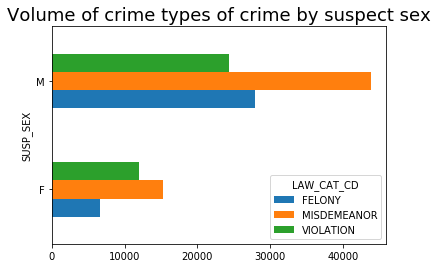

In [746]:
crime_by_sex_plot.plot.barh()
plt.title("Volume of crime types of crime by suspect sex", size=18)
plt.show()

In [747]:
#for females seems like misdemenor and violations are pretty close, while felonies are the rarest.
# For man misdemenor is significantly higer then flony but felony is mosre prevelent then violations. 

### what would be top ten ofences done by woman vs men?

In [748]:
women_crimes_only=data.loc[data["SUSP_SEX"]=="F"]

In [749]:
women=women_crimes_only.groupby(women_crimes_only["OFNS_DESC"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="CMPLNT_NUM", ascending=False).head(10)

In [750]:
women

,CMPLNT_NUM
OFNS_DESC,
HARRASSMENT 2,11991
ASSAULT 3 & RELATED OFFENSES,8376
OFF. AGNST PUB ORD SENSBLTY &,3244
FELONY ASSAULT,3236
CRIMINAL MISCHIEF & RELATED OF,1485
MISCELLANEOUS PENAL LAW,1366
PETIT LARCENY,869
GRAND LARCENY,642
OFFENSES AGAINST PUBLIC ADMINI,631


In [751]:
# looks like most prevalent among females is 2nd degree harrasment ;
# "A person is guilty of Harassment in the Second Degree when, with intent to harass, annoy or alarm another person"

In [752]:
men_crimes_only=data.loc[data["SUSP_SEX"]=="M"]

In [753]:
men=men_crimes_only.groupby(men_crimes_only["OFNS_DESC"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="CMPLNT_NUM", ascending=False).head(10)

In [754]:
men

,CMPLNT_NUM
OFNS_DESC,
HARRASSMENT 2,24279
ASSAULT 3 & RELATED OFFENSES,23443
FELONY ASSAULT,8402
MISCELLANEOUS PENAL LAW,6445
OFF. AGNST PUB ORD SENSBLTY &,5919
CRIMINAL MISCHIEF & RELATED OF,5075
ROBBERY,4748
PETIT LARCENY,3380
OFFENSES AGAINST PUBLIC ADMINI,3070


In [755]:
# for men 2nd degree harrassment is also at the top, but robbery is higher for men. 

In [756]:
# let's compare side by side

In [757]:
men_vs_women=pd.merge(men,women, on="OFNS_DESC")

In [758]:
men_vs_women=men_vs_women.rename(columns={"CMPLNT_NUM_y": "Women", "CMPLNT_NUM_x": "Men"})

In [759]:
men_vs_women

,Men,Women
OFNS_DESC,,
HARRASSMENT 2,24279,11991
ASSAULT 3 & RELATED OFFENSES,23443,8376
FELONY ASSAULT,8402,3236
MISCELLANEOUS PENAL LAW,6445,1366
OFF. AGNST PUB ORD SENSBLTY &,5919,3244
CRIMINAL MISCHIEF & RELATED OF,5075,1485
ROBBERY,4748,480
PETIT LARCENY,3380,869
OFFENSES AGAINST PUBLIC ADMINI,3070,631


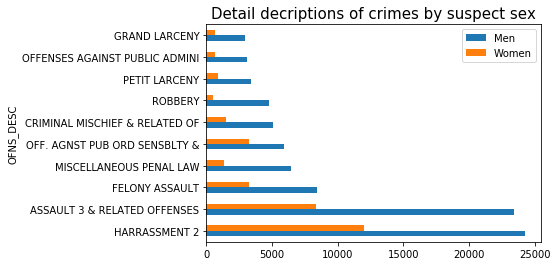

In [760]:
men_vs_women.plot.barh()
plt.title("Detail decriptions of crimes by suspect sex", size=15)
plt.show()

### how is crime related to time of the year?


In [761]:
data["Month"].dtype

dtype('O')

In [762]:
#because data in "Month" is an objectit will not show correcty on the graph, need to change it to int
data["Month"]=data["Month"].astype(int)

In [763]:
data_cross_month=pd.crosstab(data["Month"],data["Month"])

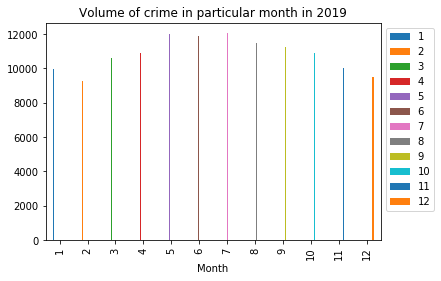

In [764]:
data_cross_month.plot.bar()
plt.legend( loc=0,bbox_to_anchor=(1,1))
plt.title("Volume of crime in particular month in 2019")
plt.show()

#### We can see that summer in months there is a clear spike in amount of crime, while the February is the calmest month


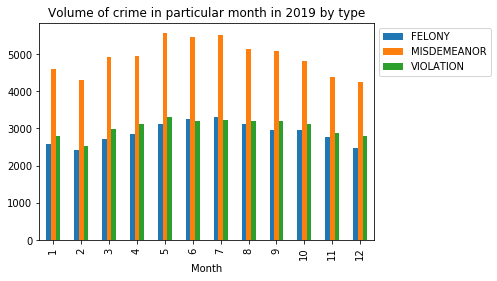

In [765]:

data_cross_month=pd.crosstab(data["Month"],data["LAW_CAT_CD"])
data_cross_month.plot.bar()
plt.legend( loc=0,bbox_to_anchor=(1,1))
plt.title("Volume of crime in particular month in 2019 by type")
plt.show()

#### Seems like this trend is even accross all types of crimes

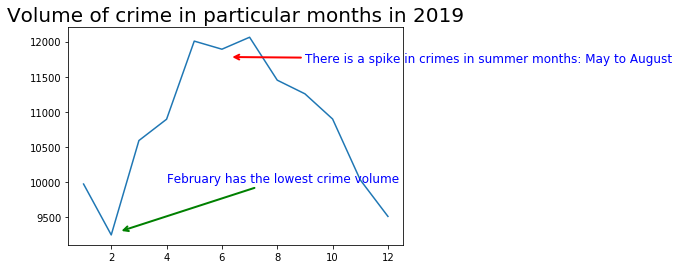

In [766]:
#aggregate by month to get number of complaints by month
time_crime=data.groupby(["Month"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="Month",ascending=False)

fig,ax=plt.subplots()
ax.plot(time_crime.index, time_crime["CMPLNT_NUM"])
plt.title("Volume of crime in particular months in 2019",size=20)
ax.annotate("There is a spike in crimes in summer months: May to August", 
            xytext=[9, 11750], 
            xy=[6.3,11780],
            arrowprops=dict(arrowstyle='->', color='red', linewidth=2), size=12,c="b", va="center")
ax.annotate("February has the lowest crime volume", 
            xytext=[4, 10000], 
            xy=[2.3,9300],
            arrowprops=dict(arrowstyle='->', color='green', linewidth=2), size=12, c="b" )
plt.show()

In [767]:
data["BORO_NM"].unique()
boros

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [768]:
bronx_month_agg=data[data["BORO_NM"]=="BRONX"].groupby(["Month"]).agg({"CMPLNT_NUM":"count"})
broooklyn_month_agg=data[data["BORO_NM"]=="BROOKLYN"].groupby(["Month"]).agg({"CMPLNT_NUM":"count"})
manhattan_month_agg=data[data["BORO_NM"]=="MANHATTAN"].groupby(["Month"]).agg({"CMPLNT_NUM":"count"})
queens_month_agg=data[data["BORO_NM"]=="QUEENS"].groupby(["Month"]).agg({"CMPLNT_NUM":"count"})
statenisland_month_agg=data[data["BORO_NM"]=="STATEN ISLAND"].groupby(["Month"]).agg({"CMPLNT_NUM":"count"})
list_boro=[bronx_month_agg, broooklyn_month_agg, manhattan_month_agg, queens_month_agg, statenisland_month_agg ]
boros=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

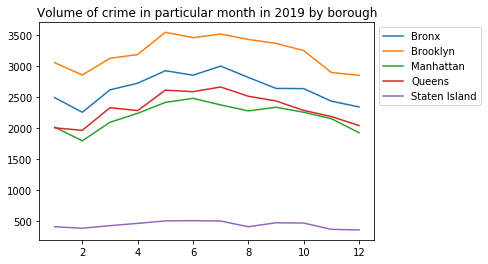

In [769]:
fig,ax=plt.subplots()

for x in list_boro:
    ax.plot(x.index,x["CMPLNT_NUM"])
plt.legend(boros, loc=0,bbox_to_anchor=(1,1))
plt.title("Volume of crime in particular month in 2019 by borough")
plt.show()

In [770]:
data.to_csv("MyCrime2019Analysis.csv", index=False)

#### Also, it seems like this monthly pattern is same for all boroughs 

### What is the most dangerous time to be out there on the streets?

In [771]:
data["CMPLNT_FR_TM"].unique()

array(['16:30:00', '15:05:00', '11:20:00', ..., '6:51:00', '9:01:00',
       '5:26:00'], dtype=object)

In [772]:
# I want to create new column that will only have hour as a time indicator 

In [773]:
data["CrimeTime"]=data.apply(lambda row: row.CMPLNT_FR_TM[:-6], axis=1)

In [774]:
data["CrimeTime"].dtype

dtype('O')

In [775]:
# converting from object to integer
data["CrimeTime"]=pd.to_numeric(data["CrimeTime"])

In [776]:
crime_activity_hourly=data.groupby(data["CrimeTime"]).agg({"CMPLNT_NUM":"count"})


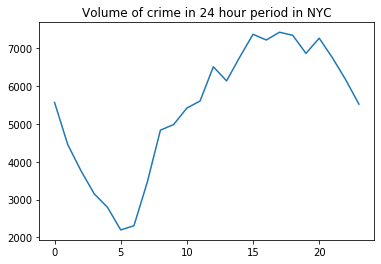

In [777]:
fig,ax=plt.subplots()
ax.plot(crime_activity_hourly.index, crime_activity_hourly["CMPLNT_NUM"])
plt.title("Volume of crime in 24 hour period in NYC")

plt.show()

In [778]:
data["LAW_CAT_CD"].unique()

array(['MISDEMEANOR', 'VIOLATION', 'FELONY'], dtype=object)

In [779]:
fellony=data[data["LAW_CAT_CD"]=="FELONY"].groupby(["CrimeTime"]).agg({"CMPLNT_NUM":"count"})
misdemeanor=data[data["LAW_CAT_CD"]=="MISDEMEANOR"].groupby(["CrimeTime"]).agg({"CMPLNT_NUM":"count"})
violation=data[data["LAW_CAT_CD"]=="VIOLATION"].groupby(["CrimeTime"]).agg({"CMPLNT_NUM":"count"})

In [780]:
law_cat_list=[fellony, misdemeanor, violation]
law_cat=["Fellony", "Misdemeanor", 'Violation']

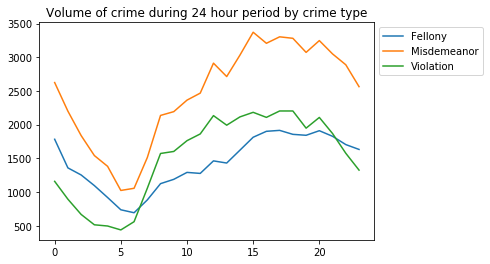

In [781]:
fig,ax=plt.subplots()

for x in law_cat_list:
    ax.plot(x.index,x["CMPLNT_NUM"])
plt.legend(law_cat, loc=0,bbox_to_anchor=(1,1))
plt.title("Volume of crime during 24 hour period by crime type")
plt.show()

#### Looks like 3 pm is the time when the volume of crime is the higests, with 5 am being the calmest hour 


### Top ofenses in Williamsburg Brooklyn?

In [782]:
wiliamsburg=data.loc[data["neighbourhood"]=="Williamsburg"]

In [783]:
wiliamsburg_only=wiliamsburg.groupby(["neighbourhood","OFNS_DESC"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="CMPLNT_NUM",ascending=False).head(10)

In [784]:
wiliamsburg_only

CMPLNT_NUM
neighbourhood OFNS_DESC                                 
Williamsburg  HARRASSMENT 2                          509
              ASSAULT 3 & RELATED OFFENSES           380
              FELONY ASSAULT                         144
              MISCELLANEOUS PENAL LAW                142
              OFF. AGNST PUB ORD SENSBLTY &          115
              CRIMINAL MISCHIEF & RELATED OF         105
              PETIT LARCENY                           82
              ROBBERY                                 76
              GRAND LARCENY                           60
              BURGLARY                                31

### top ofenses in Ridgewood Brooklyn?

In [785]:
ridgewood=data.loc[data["neighbourhood"]=="Ridgewood"]
ridgewood_only=ridgewood.groupby(["neighbourhood","OFNS_DESC"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="CMPLNT_NUM",ascending=False).head(10)

In [786]:
ridgewood_only

CMPLNT_NUM
neighbourhood OFNS_DESC                                 
Ridgewood     HARRASSMENT 2                          177
              ASSAULT 3 & RELATED OFFENSES           123
              FELONY ASSAULT                          42
              OFF. AGNST PUB ORD SENSBLTY &           30
              CRIMINAL MISCHIEF & RELATED OF          28
              MISCELLANEOUS PENAL LAW                 26
              OFFENSES AGAINST PUBLIC ADMINI          25
              ROBBERY                                 21
              PETIT LARCENY                           19
              GRAND LARCENY                           14

In [787]:
maspeth=data.loc[data["neighbourhood"]=="Maspeth"]
maspeth_only=maspeth.groupby(["neighbourhood","OFNS_DESC"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="CMPLNT_NUM",ascending=False).head(10)
maspeth_only

CMPLNT_NUM
neighbourhood OFNS_DESC                                 
Maspeth       HARRASSMENT 2                          109
              ASSAULT 3 & RELATED OFFENSES            77
              FELONY ASSAULT                          33
              MISCELLANEOUS PENAL LAW                 25
              CRIMINAL MISCHIEF & RELATED OF          22
              OFFENSES AGAINST PUBLIC ADMINI          17
              OFF. AGNST PUB ORD SENSBLTY &           16
              PETIT LARCENY                           15
              ROBBERY                                 12
              GRAND LARCENY                            5

### top 10 worst nieghboorhoods 

In [788]:
top_ten_worst=data.groupby(["neighbourhood"]).agg({"CMPLNT_NUM":"count"}).sort_values(by="CMPLNT_NUM", ascending=False).head(10)

In [789]:
top_ten_worst

,CMPLNT_NUM
neighbourhood,
Harlem,5602
Crown Heights,4398
Longwood,3909
Bedford-Stuyvesant,3831
Jamaica,3614
East Harlem,3311
East Flatbush,2886
Mount Hope,2673
East New York,2659
